In [1]:
import utils
import time
import matplotlib.pyplot as plt
from task2a import pre_process_images, one_hot_encode, SoftmaxModel
from task2 import SoftmaxTrainer


Train shape: X: (20000, 784), Y: (20000, 1)
Validation shape: X: (10000, 784), Y: (10000, 1)
Initializing weight to shape: (785, 64)
Initializing weight to shape: (64, 10)
--- 57.90965485572815 seconds ---


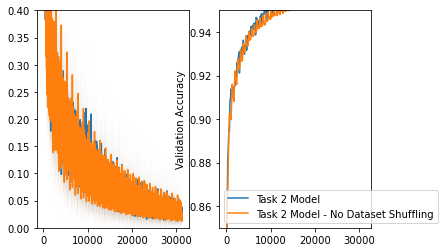

In [4]:
if __name__ == "__main__":
    # hyperparameters DO NOT CHANGE IF NOT SPECIFIED IN ASSIGNMENT TEXT
    start_time = time.time()
    num_epochs = 50
    learning_rate = .1
    batch_size = 32
    neurons_per_layer = [64, 10]
    momentum_gamma = .9  # Task 3 hyperparameter
    shuffle_data = True

    use_improved_sigmoid = False
    use_improved_weight_init = True
    use_momentum = False

    # Load dataset
    X_train, Y_train, X_val, Y_val = utils.load_full_mnist()
    X_train = pre_process_images(X_train)
    X_val = pre_process_images(X_val)
    Y_train = one_hot_encode(Y_train, 10)
    Y_val = one_hot_encode(Y_val, 10)

    model = SoftmaxModel(
        neurons_per_layer,
        use_improved_sigmoid,
        use_improved_weight_init)
    trainer = SoftmaxTrainer(
        momentum_gamma, use_momentum,
        model, learning_rate, batch_size, shuffle_data,
        X_train, Y_train, X_val, Y_val,
    )
    train_history, val_history = trainer.train(num_epochs)
    """
    # Example created in assignment text - Comparing with and without shuffling.
    # YOU CAN DELETE EVERYTHING BELOW!
    shuffle_data = False
    model_no_shuffle = SoftmaxModel(
        neurons_per_layer,
        use_improved_sigmoid,
        use_improved_weight_init)
    trainer_shuffle = SoftmaxTrainer(
        momentum_gamma, use_momentum,
        model_no_shuffle, learning_rate, batch_size, shuffle_data,
        X_train, Y_train, X_val, Y_val,
    )
    train_history_no_shuffle, val_history_no_shuffle = trainer_shuffle.train(
        num_epochs)
    shuffle_data = True
    """    

    print("--- %s seconds ---" % (time.time() - start_time))
    plt.subplot(1, 2, 1)
    utils.plot_loss(train_history["loss"],
                    "Task 2 Model", npoints_to_average=10)
    utils.plot_loss(
        train_history_no_shuffle["loss"], "Task 2 Model - No dataset shuffling", npoints_to_average=10)
    plt.ylim([0, .4])
    plt.subplot(1, 2, 2)
    plt.ylim([0.85, .95])
    utils.plot_loss(val_history["accuracy"], "Task 2 Model")
    utils.plot_loss(
        val_history_no_shuffle["accuracy"], "Task 2 Model - No Dataset Shuffling")
    plt.ylabel("Validation Accuracy")
    plt.legend()
    plt.show()